[View in Colaboratory](https://colab.research.google.com/github/SubmitCode/ReinforcemnetLearning/blob/master/fifa_prediction_part01.ipynb)

# Part 1: Explorative Dataanalysis










## Intro
Ix und Px haben ja eine Tippgruppe bei www.srf.ch . Persönlich bin ich ja nicht der grösste Fussballfan. Dennoch dachte ich, mir es wäre eine gute Gelegenheit das Verständnis für Data Science und auch die "Lust" auf Data Science bei Inventx zu schüren :-) Natürlich wäre es auch super wenn unser Tippgruppe die beste wäre. In den folgenden Posts werde ich immer mal verschiedene Fakten und Statistiken aufzeigen, die uns als Team helfen sollen unsere Vorhersagen zu stärken. Im ersten Teil geht es um Data Exploration. Dabei werde ich mal die Daten analysieren die ich so gefunden habe. 

Wenn ihr noch mehr Daten habt oder gute Webseiten kennt, welche man mit Webscrapern abgrasen kann. Lasst es mich wissen und wir besorgen uns die Date. Als frei nach dem Motto "let's get our hands dirty" - lasst uns starten. 

.. und unter uns gesagt ist das ganze nicht immer selbstlos. Es hilft auch mir wieder mein Wissen zu erweitern und aufzufrischen.


## Generelle Infos
Vielleicht sind manchen Dinge nicht ganz verständlich. Bei Fragen könnt ihr einfach auf mich zukommen oder einen Post auf Github hinterlassen.
https://github.com/SubmitCode/fifa_prediction

## Setup
Wenn ihr dies liest seit ihr im Colab-Portal von Google. Dies ist Googles Interpretation von Jupyter Notebooks. Es hilft übers Web einfach mit anderen zusammen zu arbeiten und ist zudem Gratis und das beste ist, Google stellt gratis GPU's zu Verfügung um auch komplexere ML (Machine Learning) - Modelle zu testen. [Mehr](https://colab.research.google.com/notebooks/welcome.ipyn) über Colab Notebooks findet ihr hier.

## Datenquellen
Zu allererst brauchen wir mal Daten. Hier bin ich auf www.kaggle.com fündig gewerden. Insgesamt werden wir mit 3 Datasets starten.
- __FIFA Soccer Rankings__ Infos über die Rankingmehthode findet ihr [hier](https://en.wikipedia.org/wiki/FIFA_World_Rankings). Diese Daten wurden von der [Fifa Page](https://www.fifa.com/fifa-world-ranking/ranking-table/men/index.html) extrahiert. Wer die Daten selbst runterladen will kann dies [hier](https://www.kaggle.com/tadhgfitzgerald/fifa-international-soccer-mens-ranking-1993now/data) tun . Zu den Daten selbst kommen wir später. 
- __FIFA 18 Complete Player dataset__ Das sind mal richtig coole Daten. Hier finden wir Daten von allen Spielern der Fifa für das Jahr 2018. Dabei hat jeder Spieler über 70 Attribute. Angefangen über Gewicht, Salär bis hin zu "Aggression", "Preferred Position" etc.
- __FIFA World Cup__ [Hier](https://www.kaggle.com/abecklas/fifa-world-cup/data) findet ihr die Daten aller WM Spiele seit 1930. 



# Data Description

In diesem Abschnitt will ich euch die ersten Datasets vorstellen. Laut Wikipedia werden folgende wesentlichen Faktoren bei den Ranking berücksichtigt:


*   Match Result - hier kann man bis zu 3 Punkte erreichen 
*   Match Status - hierbei geht es darum ob es ein Freundschaftsspiel ist oder z.B. ein Meisterschaftsspiel
*   Opposition strength - Formel: (200 - ranking position) / 100
*   Regional strength - hierbei gibt es verschiedene Gruppen. Dies ist insofern wichtig da vielleich in Asien der Fussball nicht so stark vertreten ist wie z.B. in Südamerika.



## Fifa Rankings


In [0]:
# import von den libraries die wir für die Berechnungen und Visualisierungen 
# benötigen
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
# laod data from github
pathFifaRanking = "https://github.com/SubmitCode/fifa_prediction/raw/master/data/FIFASoccerRankings/fifa_ranking.csv"
rank_data = pd.read_csv(pathFifaRanking)

In [66]:
rank_data.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [67]:
print("data frame general infos:")
print(rank_data.info())

data frame general infos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
rank                       57793 non-null int64
country_full               57793 non-null object
country_abrv               57793 non-null object
total_points               57793 non-null float64
previous_points            57793 non-null int64
rank_change                57793 non-null int64
cur_year_avg               57793 non-null float64
cur_year_avg_weighted      57793 non-null float64
last_year_avg              57793 non-null float64
last_year_avg_weighted     57793 non-null float64
two_year_ago_avg           57793 non-null float64
two_year_ago_weighted      57793 non-null float64
three_year_ago_avg         57793 non-null float64
three_year_ago_weighted    57793 non-null float64
confederation              57793 non-null object
rank_date                  57793 non-null object
dtypes: float64(9), int64(3), object(4)
memory usage: 7.1+ MB
None


In [68]:
rank_data.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [69]:
print("das frühste rank_date ist {}".format(rank_data.rank_date.min()))
print("das letzte rank_date ist {}".format(rank_data.rank_date.max()))
conditions = (rank_data.rank_date == rank_data.rank_date.max()) 
latestRank = rank_data[conditions].sort_values('rank')

print("der aktuelle Ranglistenführer ist {}".format(latestRank.country_full.iloc[0]))
print("die Schweiz ist derzeit auf Rang {}!".format(latestRank.loc[latestRank.country_full == 'Switzerland', 'rank'].to_string(index=False, header=False)))



das frühste rank_date ist 1993-08-08
das letzte rank_date ist 2018-06-07
der aktuelle Ranglistenführer ist Germany
die Schweiz ist derzeit auf Rang 6!


Insgesamt hat die Tabelle __57 793__ Zeilen und __16__ Spalten. Im Wesentlichen gibt es nur wenige wichtige Spalten. Die anderen wurden davon abgeleitet.
- rank
- total_points
- country

Im Data Science Bereich ist es oft so, dass versucht wird mit der einfachsten Annahmen anzufange. Deshalb wäre eine gute Schätzung, wenn wir die Ränge hernehmen und dadurch die Gruppensieger bestimmen. Deshalb schauen uns wir am besten mal an wie sich die Gruppe E (die Gruppe von der Schweiz)entwickelt hat.

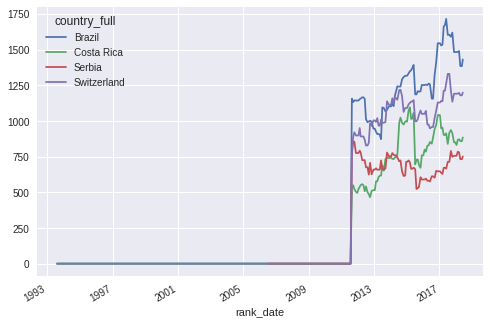

In [103]:
# gruppen
groupE = ["Brazil", "Switzerland", "Costa Rica", "Serbia"]

# convert string to date
rank_data.rank_date = pd.to_datetime(rank_data.rank_date)

#groupE = ["Switzerland"]
t_data = rank_data.loc[rank_data.country_full.isin(groupE), ['rank_date', 'total_points', 'country_full']]
points_groupE = pd.pivot_table(t_data, columns='country_full', values='total_points', index='rank_date', aggfunc=np.sum)
points_groupE.plot()
#rank_groupE.head(1500)
#rank_groupE.plot()




